**import packages**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**define function** ``read_data``

In [2]:
def read_data(filename="data.txt"):
    data = []
    with open(filename,"r") as f:
        for line in f:
            if "Temperature" in line or "liquid" in line or "infinite" in line or "undefined" in line:
                continue
            line = line.split()
            data.append(line[:-1])
    data = np.array(data,dtype=np.float64)
    return data

**define function** ``write_data``

In [3]:
def write_data(filename,data,first_row=None):
    '''
    Data must be stored in an numpy array column-shaped
    Describe the type of data in "first_row"
    '''
    with open(filename,"w") as f:
        if first_row != None:
            f.write(first_row + "\n")
        for k in range(np.shape(data)[0]):
            for i in range(np.shape(data)[1]):
                f.write(f'{data[k,i]:13.4e}')
            f.write('\n')


**define function** `liniar_regress`

In [4]:
def lin_regress(X,Y,grade=None):
    if grade==None:
        from scipy.optimize import curve_fit

        def f(x,m,q):
            return x*m + q
        
        fit = curve_fit(f,X,Y,p0=[0,1])
        fit = fit[0]
        m = fit[0]
        q = fit[1]

# ---------------------------- #
    else:
        fit = np.polyfit(X,Y,grade)
        m = fit[-2]
        q = fit[-1]

    return m, q


**define function** `plot_EOS`

In [5]:
def plot_EOS(X,Y,ttl="EOS",lgd="",grade=3):

    m, q = lin_regress(X,Y,grade=grade)
    x = np.linspace(min(X),max(X))

    lgd_dat = "dati " + lgd
    lgd_reg = "regressione " + lgd + r'B$_2$=' + '{:.3}'.format(m)

    plt.figure()
    plt.plot(X,Y,'.-',label=lgd_dat)
    plt.plot(x,m*x+q,'-',label=lgd_reg)
    plt.xlabel(r'$\rho$')
    plt.ylabel(r'P / (RT$\rho)$')
    # plt.ylabel(r'$\frac{P}{RT\rho}$')
    plt.title(ttl)
    plt.legend()
    plt.grid()
    plt.show()

**put all together**

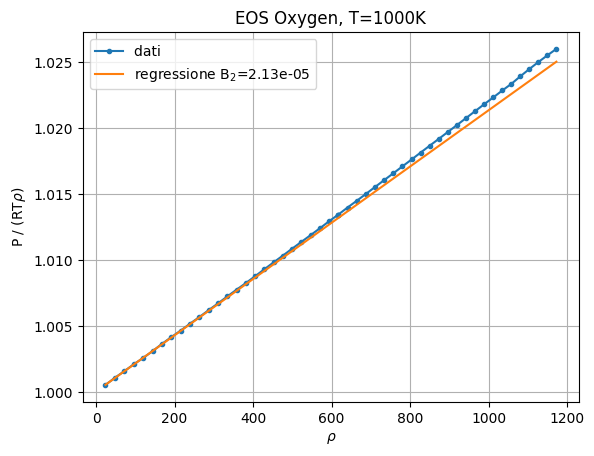

In [6]:
prova = True
if(prova):
    temperature = 1000

    filename = 'data_T' + str(temperature) + '.txt'
    filepath = 'Oxygen/data/'
    filename = filepath + filename

    data = read_data(filename=filename)
    T = data[:,0]
    P = data[:,1]
    d = data[:,2]
    red_P = P/8.314/T/d*1e6
    # print(red_P)

    plot_EOS(X=d,Y=red_P,ttl='EOS Oxygen, T=1000K',grade=3)
    # plt.plot(P,d)

## Virial Coefficien B2
 
**define funcion** `compute_B2`

In [7]:
def compute_B2(temperature=300,element='Oxygen',grade=None):
    filename = 'data_T' + str(temperature) + '.txt'
    filepath = element + '/data/'
    filename = filepath + filename

    data = read_data(filename=filename)
    T = data[:,0]
    P = data[:,1]
    d = data[:,2]
    red_P = P/8.314/T/d*1e6

    B2, q = lin_regress(d,red_P,grade=grade)

    return B2

save all the B2 coefficients for different temperatures

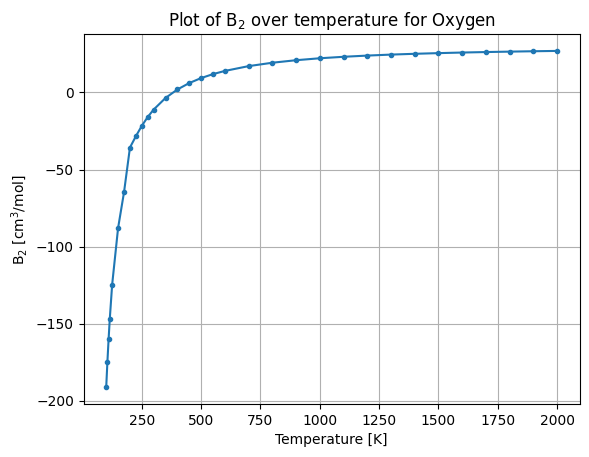

In [8]:
T_Oxygen = [100, 105, 110, 115, 125, 150, 175, 200, 225, 250, 275, 300, 350, 400, 450, 
                500, 550, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 
                1500, 1600, 1700, 1800, 1900, 2000]

m3_to_cm3 = 1e6  # conversione di B2 da m^3/mol a cm^3/mol

data_B2_Oxygen = np.ndarray((np.size(T_Oxygen),2))
for i in range(np.size(T_Oxygen)):
    data_B2_Oxygen[i,0] = T_Oxygen[i]
    data_B2_Oxygen[i,1] = (compute_B2(temperature=T_Oxygen[i],element='Oxygen') * m3_to_cm3)

write_data(filename="Oxygen/B2_Oxygen.txt",data=data_B2_Oxygen,first_row="Temperature - B_2 -> Oxygen")

plt.plot(T_Oxygen,data_B2_Oxygen[:,1],'.-')
plt.xlabel("Temperature [K]")
plt.ylabel(r'B$_2$ [cm$^3$/mol]')
plt.title(r'Plot of B$_2$ over temperature for Oxygen')
plt.grid()

**Do the same thing for Methane**

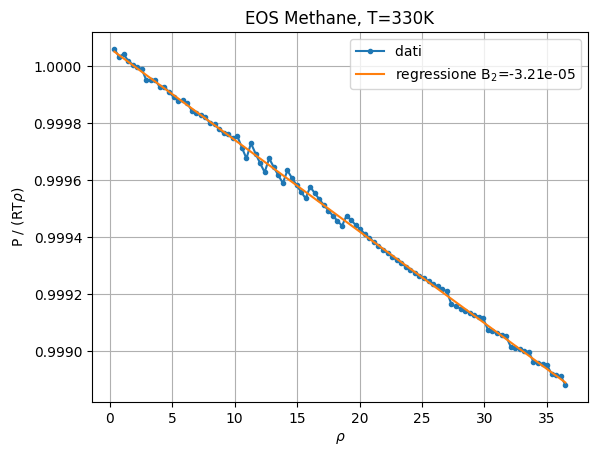

In [9]:
prova = True
if(prova):
    temperature = 190.564
    temperature = 330

    filename = 'data_T' + str(temperature) + '.txt'
    filepath = 'Methane/data/'
    filename = filepath + filename

    data = read_data(filename=filename)
    T = data[:,0]
    P = data[:,1]
    d = data[:,2]
    red_P = P/8.314/T/d*1e6
    # print(red_P)

    plot_EOS(X=d,Y=red_P,ttl='EOS Methane, T=' + str(temperature) + 'K',grade=1)
    # plt.plot(P,d)

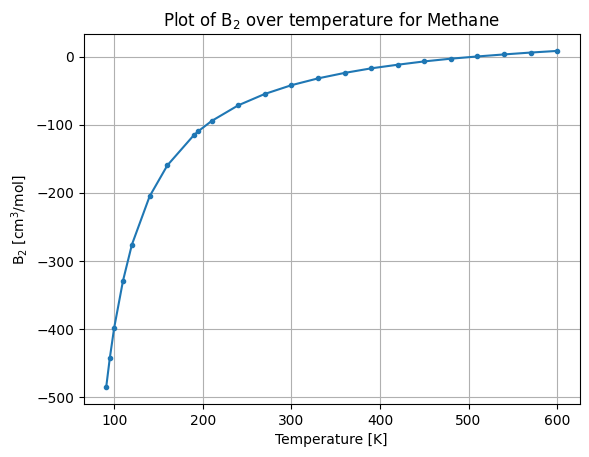

In [10]:
T_Methane = [91, 95, 100, 110,
                120, 140, 160, 190, 195,
                210, 240, 270, 300, 330, 360, 390, 420, 450, 480, 510, 540, 570, 600]

m3_to_cm3 = 1e6  # conversione di B2 da m^3/mol a cm^3/mol

data_B2_Methane = np.ndarray((np.size(T_Methane),2))
for i in range(np.size(T_Methane)):
    data_B2_Methane[i,0] = T_Methane[i]
    data_B2_Methane[i,1] = (compute_B2(temperature=T_Methane[i],element='Methane') * m3_to_cm3)

write_data(filename="Methane/B2_Methane.txt",data=data_B2_Methane,first_row="Temperature - B_2 -> Methane")

plt.plot(T_Methane,data_B2_Methane[:,1],'.-')
plt.xlabel("Temperature [K]")
plt.ylabel(r'B$_2$ [cm$^3$/mol]')
plt.title(r'Plot of B$_2$ over temperature for Methane')
plt.grid()

## Now let's fit $B_2(T)$

Let's define the function to compute the Lennard-Jones potential:

In [11]:
import numpy as np
from scipy import integrate

def virial_coefficient(potential, kT, *args, **kwargs):
    """
    Compute the second virial coefficient for an arbitrary pair potential `u(r)`
    at a temperature equal to `kT` over k_B

    The additional arguments `*args` and `**kwargs` are passed to the
    potential function.
    """
    def integrand(x):
        return - 2*np.pi * x**2 * (np.exp(- potential(x, *args, **kwargs) / kT) - 1)
    return integrate.quad(integrand, 0., np.inf)[0]

def lj(r, epsilon=1.0, sigma=1.0):
    """Lennard-Jones potential"""
    return 4*epsilon * ((sigma/r)**12 - (sigma/r)**6)

@np.vectorize
def sw(r, epsilon=1.0, sigma=1.0, R=1.0):
    """Square well potential"""
    if r <= sigma:
        return 1e10 # np.inf
    elif sigma < r < sigma * R:
        return - epsilon
    else:
        return 0

def virial_coefficient_sw(kT, epsilon=1.0, sigma=1.0, R=1.2):
    """Analytical expression of B_2 for the square well potential"""
    return 2 * np.pi / 3 * sigma**3 * (1 - (np.exp(epsilon / kT) - 1) * (R**3 - 1))

In [12]:
def logx_grid(x1, x2, n):
    """Create a list of n numbers exponentially spaced from x1>0 to x2."""
    xx = (x2 / x1)**(1 / n)
    return [x1] + [x1 * xx**(i + 1) for i in range(1, n)]

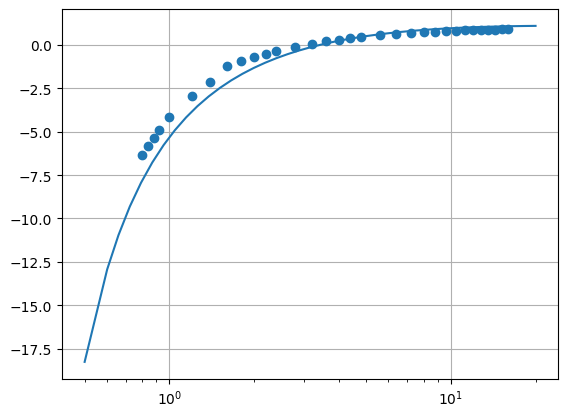

In [14]:
Oxygen = np.loadtxt('./Oxygen/B2_Oxygen.txt', unpack=True)
Ts = np.array(logx_grid(0.5, 20, 40))
plt.semilogx(Oxygen[0] / 125, Oxygen[1] / 30, 'o', color='C0')
plt.semilogx(Ts, [virial_coefficient(lj, T, epsilon=1, sigma=1) for T in Ts], '-')
plt.grid()
plt.show()

In [15]:
from scipy.optimize import curve_fit
import warnings

warnings.filterwarnings("ignore")

def virial_coefficient_vdw(T, a, b):
    return b - a/T

def virial_coefficient_lj(T, epsilon, sigma):
    return np.array([virial_coefficient(lj, _T, epsilon=epsilon, sigma=sigma) for _T in T])

Oxygen = np.loadtxt('./Oxygen/B2_Oxygen.txt', unpack=True)
Oxygen[1] = Oxygen[1] * (10/6)  # Convert from cm^3/mol to A^3

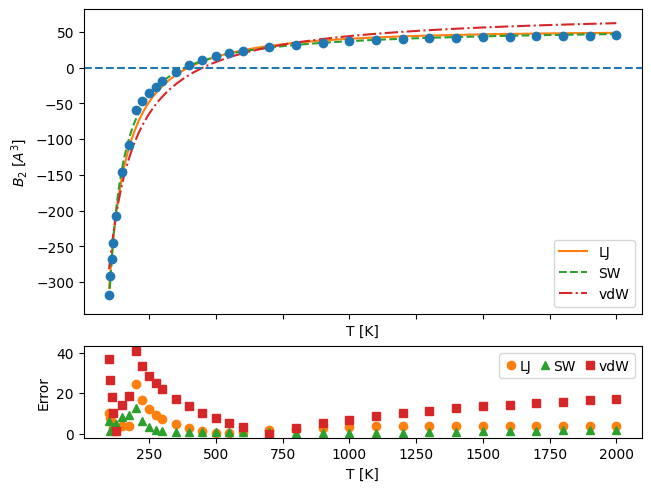

: 

In [ ]:
fig, axs = plt.subplots(2, 1, sharex=True, layout='constrained', height_ratios=(1, 0.3))

# Main figure
Ts = np.array(logx_grid(Oxygen[0][0], Oxygen[0][-1], 40))
popt_lj, pcov = curve_fit(virial_coefficient_lj, Oxygen[0], Oxygen[1], p0=(100, 1))
popt_sw, pcov = curve_fit(virial_coefficient_sw, Oxygen[0], Oxygen[1], p0=(100, 1, 2))
popt_vdw, pcov = curve_fit(virial_coefficient_vdw, Oxygen[0], Oxygen[1], p0=(100, 1))
ax = axs[0]
ax.plot(Ts, virial_coefficient_lj(Ts, *popt_lj), '-', color='C1', label='LJ')
ax.plot(Ts, virial_coefficient_sw(Ts, *popt_sw), '--', color='C2', label='SW')
ax.plot(Ts, virial_coefficient_vdw(Ts, *popt_vdw), '-.', color='C3', label='vdW')
ax.plot(*Oxygen, 'o', color='C0')
ax.set_xlabel('T [K]')
ax.set_ylabel('$B_2$ [$A^3$]')
ax.legend()
ax.axhline(0, ls='dashed')

# Error on lower panel
ax = axs[1]
ax.plot(Oxygen[0], np.abs(virial_coefficient_lj(Oxygen[0], *popt_lj)-Oxygen[1]), 'o', color='C1', label='LJ')
ax.plot(Oxygen[0], np.abs(virial_coefficient_sw(Oxygen[0], *popt_sw)-Oxygen[1]), '^', color='C2', label='SW')
ax.plot(Oxygen[0], np.abs(virial_coefficient_vdw(Oxygen[0], *popt_vdw)-Oxygen[1]), 's', color='C3', label='vdW')
ax.set_xlabel('T [K]')
ax.set_ylabel('Error')
ax.legend(ncols=3, handlelength=1, handletextpad=0.1, columnspacing=0.5)

# fig.savefig('./_static/Oxygen_error.svg')
fig.show()